<a href="https://www.kaggle.com/code/puritymacharia/notebookf547642f0b?scriptVersionId=300467199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline 
train_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalBath,TotalSF,TotalPorchSF,ExterQualScore,KitchenQualScore,MedNhbdPrice,TotalSF_x_Quality,Bathrooms_x_Quality,TotalGarageSF,Bathrooms_x_OverallQual
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,3.5,2566,61,4,4,197200.0,10264,14.0,548,24.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2.5,2524,0,3,3,218000.0,7572,7.5,460,15.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,3.5,2706,42,4,4,197200.0,10824,14.0,608,24.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2.0,2473,307,3,4,200624.0,7419,8.0,642,14.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,3.5,3343,84,4,4,301500.0,13372,14.0,836,28.0


In [61]:
len(df.columns)
list(df.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [62]:
df["RemodelAge"]=df["YrSold"] - df["YearRemodAdd"]
df["HouseAge"]=df["YrSold"] - df["YearBuilt"]
df["TotalBath"] = df["FullBath"] + 0.5*df["HalfBath"] + df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"]
df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df["TotalPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
qual_map = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}

df["ExterQualScore"] = df["ExterQual"].map(qual_map)
df["KitchenQualScore"] = df["KitchenQual"].map(qual_map)
neigh_median = df.groupby("Neighborhood")["SalePrice"].median()
df["MedNhbdPrice"] = df["Neighborhood"].map(neigh_median)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalBath,TotalSF,TotalPorchSF,ExterQualScore,KitchenQualScore,MedNhbdPrice,TotalSF_x_Quality,Bathrooms_x_Quality,TotalGarageSF,Bathrooms_x_OverallQual
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,3.5,2566,61,4,4,197200.0,10264,14.0,548,24.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2.5,2524,0,3,3,218000.0,7572,7.5,460,15.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,3.5,2706,42,4,4,197200.0,10824,14.0,608,24.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2.0,2473,307,3,4,200624.0,7419,8.0,642,14.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,3.5,3343,84,4,4,301500.0,13372,14.0,836,28.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   MSZoning                 1460 non-null   object 
 3   LotFrontage              1201 non-null   float64
 4   LotArea                  1460 non-null   int64  
 5   Street                   1460 non-null   object 
 6   Alley                    91 non-null     object 
 7   LotShape                 1460 non-null   object 
 8   LandContour              1460 non-null   object 
 9   Utilities                1460 non-null   object 
 10  LotConfig                1460 non-null   object 
 11  LandSlope                1460 non-null   object 
 12  Neighborhood             1460 non-null   object 
 13  Condition1               1460 non-null   object 
 14  Condition2              

In [64]:
df.isnull().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                259
LotArea                      0
                          ... 
MedNhbdPrice                 0
TotalSF_x_Quality            0
Bathrooms_x_Quality          0
TotalGarageSF                0
Bathrooms_x_OverallQual      0
Length: 93, dtype: int64

In [65]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotalBath,TotalSF,TotalPorchSF,ExterQualScore,KitchenQualScore,MedNhbdPrice,TotalSF_x_Quality,Bathrooms_x_Quality,TotalGarageSF,Bathrooms_x_OverallQual
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,2.210616,2572.893151,87.084932,3.39589,3.511644,174583.954795,8987.218493,8.005137,472.980137,14.070548
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.785399,823.598492,105.190364,0.57428,0.663760,55900.957072,4163.807401,3.759358,213.804841,7.135175
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,1.000000,334.000000,0.000000,2.00000,2.000000,88000.000000,668.000000,2.000000,0.000000,1.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,2.000000,2014.000000,0.000000,3.00000,3.000000,135000.000000,6192.000000,6.000000,334.500000,9.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,2.000000,2479.000000,48.000000,3.00000,3.000000,179900.000000,7905.000000,7.500000,480.000000,12.500000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,2.500000,3008.500000,136.000000,4.00000,4.000000,197200.000000,11112.000000,10.000000,576.000000,18.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,6.000000,11752.000000,1027.000000,5.00000,5.000000,315000.000000,58760.000000,22.500000,1418.000000,45.000000


In [66]:
df.isnull().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                259
LotArea                      0
                          ... 
MedNhbdPrice                 0
TotalSF_x_Quality            0
Bathrooms_x_Quality          0
TotalGarageSF                0
Bathrooms_x_OverallQual      0
Length: 93, dtype: int64

In [67]:
new_features=["HouseAge", "TotalBath", "RemodelAge","TotalSF","TotalPorchSF"]
df[new_features].isnull().sum()


HouseAge        0
TotalBath       0
RemodelAge      0
TotalSF         0
TotalPorchSF    0
dtype: int64

In [68]:
X=df[new_features]
y=df["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 35798.84910963387


In [69]:
import sklearn
print(sklearn.__version__)

1.6.1


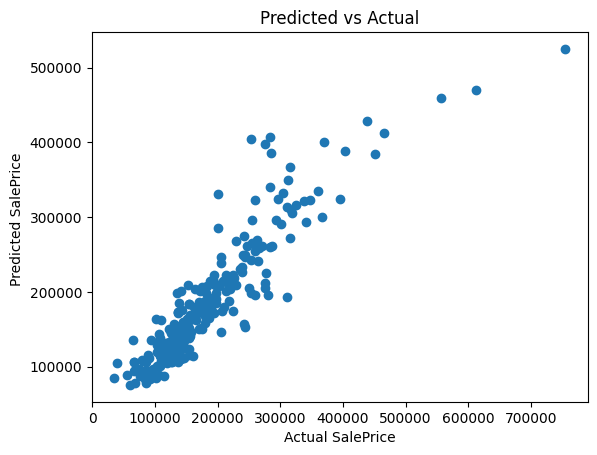

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice ")
plt.title("Predicted vs Actual")
plt.show()

In [71]:
median_price=df.groupby("Neighborhood")["SalePrice"].median()
df["MedNhbdPrice"]=df["Neighborhood"].map(median_price)
Quality_map={"Po":1,"Fa":2,"Ta":3,"Gd":4, "Ex":5}
df["ExterQualScore"]=df["ExterQual"].map(qual_map)
df["KitchenQualScore"]=df["KitchenQual"].map(qual_map)
df["TotalSF_x_Quality"]=df["TotalSF"] * df["ExterQualScore"]
df["Bathrooms_x_Quality"] = df["TotalBath"] * df["KitchenQualScore"]
df["TotalGarageSF"]=df["GarageArea"].fillna(0)
df["Bathrooms_x_OverallQual"] = df["TotalBath"] * df["OverallQual"]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalBath,TotalSF,TotalPorchSF,ExterQualScore,KitchenQualScore,MedNhbdPrice,TotalSF_x_Quality,Bathrooms_x_Quality,TotalGarageSF,Bathrooms_x_OverallQual
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,3.5,2566,61,4,4,197200.0,10264,14.0,548,24.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2.5,2524,0,3,3,218000.0,7572,7.5,460,15.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,3.5,2706,42,4,4,197200.0,10824,14.0,608,24.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2.0,2473,307,3,4,200624.0,7419,8.0,642,14.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,3.5,3343,84,4,4,301500.0,13372,14.0,836,28.0


In [72]:
new_features=["HouseAge", "TotalBath", "RemodelAge","TotalSF","TotalPorchSF","ExterQualScore", "Bathrooms_x_OverallQual","KitchenQualScore","TotalSF_x_Quality","Bathrooms_x_Quality"]
df[new_features].isnull()

,HouseAge,TotalBath,RemodelAge,TotalSF,TotalPorchSF,ExterQualScore,Bathrooms_x_OverallQual,KitchenQualScore,TotalSF_x_Quality,Bathrooms_x_Quality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False


In [73]:
X=df[new_features]
y=df["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 32190.905812636374


In [74]:
scores= cross_val_score(model,X,y,scoring="neg_root_mean_squared_error",cv=5)
print("Cross-validated RMSE:", -scores.mean())

Cross-validated RMSE: 32190.138806663745


In [75]:
model.fit(X,y)
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df["HouseAge"]=test_df["YrSold"]- test_df["YearBuilt"]
print("HouseAge" in test_df.columns)



True


In [76]:
test_df["RemodelAge"]=test_df["YrSold"] - test_df["YearRemodAdd"]
print("RemodelAge" in test_df.columns)

True


In [77]:
test_df["TotalBath"] = test_df["FullBath"] + 0.5*test_df["HalfBath"] + test_df["BsmtFullBath"] + 0.5*test_df["BsmtHalfBath"]
print("TotalBath" in test_df .columns)

True


In [78]:
test_df["TotalSF"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]
print("TotalSF" in test_df .columns)

True


In [79]:
test_df["TotalPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]
print("TotalPorchSF" in test_df .columns)

True


In [80]:
test_df["ExterQualScore"] = test_df["ExterQual"].map(qual_map)
print("ExterQualScore" in test_df.columns)

True


In [81]:
test_df["KitchenQualScore"] = test_df["KitchenQual"].map(qual_map)
print("KitchenQualScore" in test_df.columns)

True


In [82]:
print(test_df[["ExterQualScore","KitchenQualScore"]].isnull().sum())

ExterQualScore      0
KitchenQualScore    1
dtype: int64


In [83]:
test_df["KitchenQualScore"] = test_df["KitchenQualScore"].fillna(3)
print(test_df["KitchenQualScore"].isnull().sum())

0


In [84]:
test_df["Bathrooms_x_OverallQual"] = (
    test_df["TotalBath"] * test_df["OverallQual"]
)

In [85]:
test_df["TotalSF_x_Quality"] = (
    test_df["TotalSF"] * test_df["OverallQual"]
)

In [86]:
test_df["Bathrooms_x_Quality"] = (
    test_df["TotalBath"] * test_df["ExterQualScore"]
)

In [87]:
missing_cols = [col for col in new_features if col not in test_df.columns]
print(missing_cols)

[]


In [88]:
print([col for col in test_df.columns if "Kitchen" in col])

['KitchenAbvGr', 'KitchenQual', 'KitchenQualScore']


In [89]:
print(new_features)

['HouseAge', 'TotalBath', 'RemodelAge', 'TotalSF', 'TotalPorchSF', 'ExterQualScore', 'Bathrooms_x_OverallQual', 'KitchenQualScore', 'TotalSF_x_Quality', 'Bathrooms_x_Quality']


In [90]:
X_test_final = test_df[X.columns]

In [91]:
predictions=model.predict(X_test_final)

In [92]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": predictions
})

In [93]:
submission.to_csv("submission.csv", index=False)

In [94]:
X_test_final.head()

,HouseAge,TotalBath,RemodelAge,TotalSF,TotalPorchSF,ExterQualScore,Bathrooms_x_OverallQual,KitchenQualScore,TotalSF_x_Quality,Bathrooms_x_Quality
0,49,1.0,49,1778.0,120,3,5.0,3.0,8890.0,3.0
1,52,1.5,52,2658.0,36,3,9.0,4.0,15948.0,4.5
2,13,2.5,12,2557.0,34,3,12.5,3.0,12785.0,7.5
3,12,2.5,12,2530.0,36,3,15.0,4.0,15180.0,7.5
4,18,2.0,18,2560.0,226,4,16.0,4.0,20480.0,8.0


In [95]:
print(predictions[:5])

[133324.5  259131.07 201259.6  277183.53 330212.52]


In [96]:
import numpy as np

In [97]:
y=np.log(train_df["SalePrice"])

In [98]:
model.fit(X,y)
log_predictions=model.predict(X_test_final)

In [103]:
predictions=np.exp(log_predictions)

In [107]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": predictions
})

submission.to_csv("submission.csv", index=False)

In [104]:
print(submission.head())

     Id      SalePrice
0  1461  132195.394241
1  1462  243802.138141
2  1463  194252.635792
3  1464  270964.300767
4  1465  318738.776023
